Minimum loss: 108.61284637451172
Final loss: 1123.2681884765625


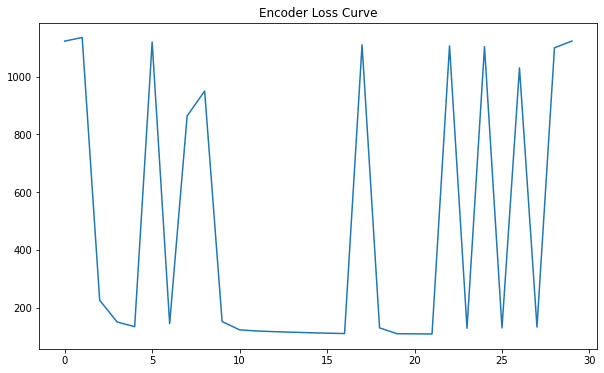

In [22]:
import matplotlib.pyplot as plt
import pickle
import os

ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_flip_only'
with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum loss:', min(history['loss']))
print('Final loss:', history['loss'][-1])

plt.figure(figsize=(10, 6))
plt.title('Encoder Loss Curve')
plt.plot(history['loss'])
plt.show()

In [18]:
!python evaluate_classifier.py -d "supervised_tissue_224_0.5_1024_256_30_0.0005_supervised"

Traceback (most recent call last):
  File "evaluate_classifier.py", line 52, in <module>
    visualize_training(os.path.join(DIR, 'history.pickle'))
  File "/tf/ssl/utils/train/visualization.py", line 7, in visualize_training
    with open(history_path, 'rb') as file:
FileNotFoundError: [Errno 2] No such file or directory: 'supervised_tissue_224_0.5_1024_256_30_0.0005_supervised/history.pickle'
